In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from topostats.io import LoadScans

In [23]:
def remove_tilt(image: np.ndarray, mask: np.ndarray = None):
    """
    Removes planar tilt from an image (linear in 2D space). It uses a linear fit of the medians
    of the rows and columns to determine the linear slants in x and y directions and then subtracts
    the fit from the columns.

    Parameters
    ----------
    image: np.ndarray
        2-D image of the data to remove the planar tilt from.
    mask: np.ndarray
        Boolean array of points to mask out (ignore).
    img_name: str
        Name of the image (to be able to print information in the console).
    Returns
    -------
    np.ndarray
        Returns a copy of the input image with the planar tilt removed
    """
    image = image.copy()
    if mask is not None:
        read_matrix = np.ma.masked_array(image, mask=mask, fill_value=np.nan).filled()
    else:
        read_matrix = image

    # Line of best fit
    # Calculate medians
    medians_x = [np.nanmedian(read_matrix[:, i]) for i in range(read_matrix.shape[1])]
    medians_y = [np.nanmedian(read_matrix[j, :]) for j in range(read_matrix.shape[0])]

    # Fit linear x
    px = np.polyfit(range(0, len(medians_x)), medians_x, 1)
    py = np.polyfit(range(0, len(medians_y)), medians_y, 1)

    if px[0] != 0:
        if not np.isnan(px[0]):
            for row in range(0, image.shape[0]):
                for col in range(0, image.shape[1]):
                    image[row, col] -= px[0] * (col)
    if py[0] != 0:
        if not np.isnan(py[0]):
            for row in range(0, image.shape[0]):
                for col in range(0, image.shape[1]):
                    image[row, col] -= py[0] * (row)

    return image

[Wed, 01 Mar 2023 15:55:32] [INFO    ] [topostats] Extracting image from perovskite/20230207_MeO_NPs_perov_10um.0_00004.spm
[Wed, 01 Mar 2023 15:55:32] [INFO    ] [topostats] Loading image from : perovskite/20230207_MeO_NPs_perov_10um.0_00004.spm
[Wed, 01 Mar 2023 15:55:32] [INFO    ] [topostats] [20230207_MeO_NPs_perov_10um.0_00004] : Loaded image from : perovskite/20230207_MeO_NPs_perov_10um.0_00004.spm
[Wed, 01 Mar 2023 15:55:32] [INFO    ] [topostats] [20230207_MeO_NPs_perov_10um.0_00004] : Extracted channel Height Sensor
[Wed, 01 Mar 2023 15:55:32] [INFO    ] [topostats] [20230207_MeO_NPs_perov_10um.0_00004] : Pixel to nm scaling : 19.53125


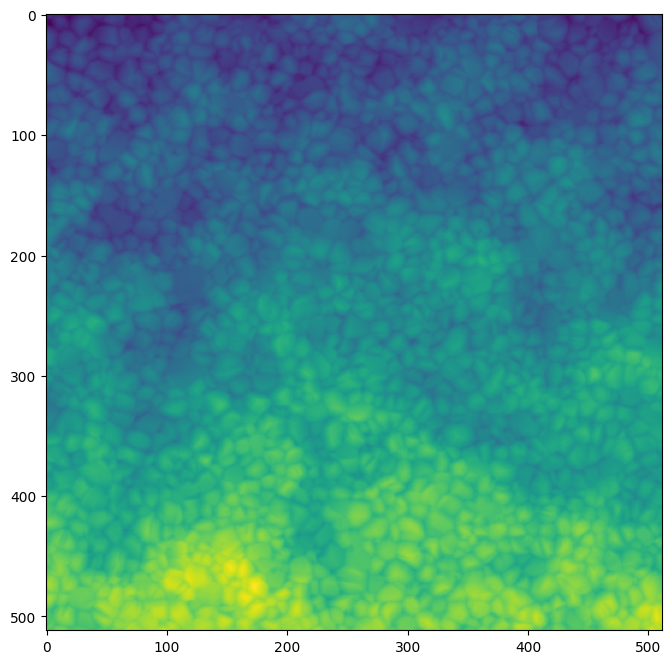

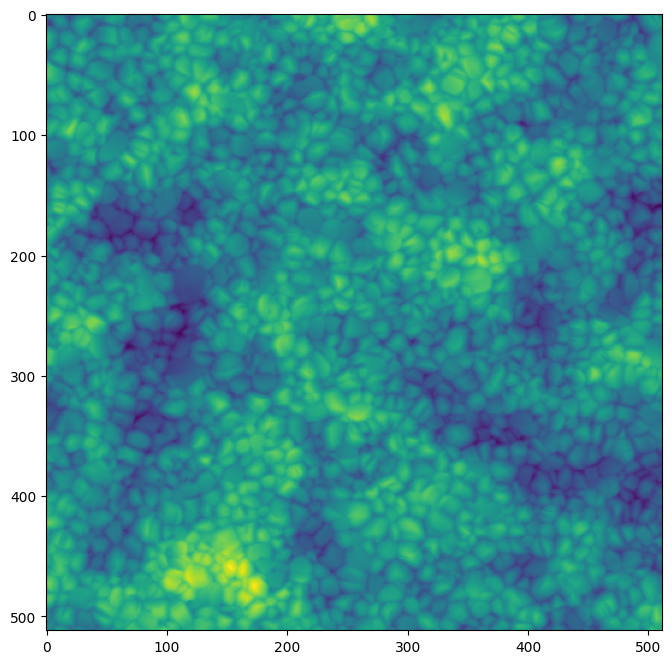

[Wed, 01 Mar 2023 15:55:33] [INFO    ] [topostats] Extracting image from perovskite/20230207_Me4_NPs_perov_1um.0_00009.spm
[Wed, 01 Mar 2023 15:55:33] [INFO    ] [topostats] Loading image from : perovskite/20230207_Me4_NPs_perov_1um.0_00009.spm
[Wed, 01 Mar 2023 15:55:33] [INFO    ] [topostats] [20230207_Me4_NPs_perov_1um.0_00009] : Loaded image from : perovskite/20230207_Me4_NPs_perov_1um.0_00009.spm
[Wed, 01 Mar 2023 15:55:33] [INFO    ] [topostats] [20230207_Me4_NPs_perov_1um.0_00009] : Extracted channel Height Sensor
[Wed, 01 Mar 2023 15:55:33] [INFO    ] [topostats] [20230207_Me4_NPs_perov_1um.0_00009] : Pixel to nm scaling : 1.953125


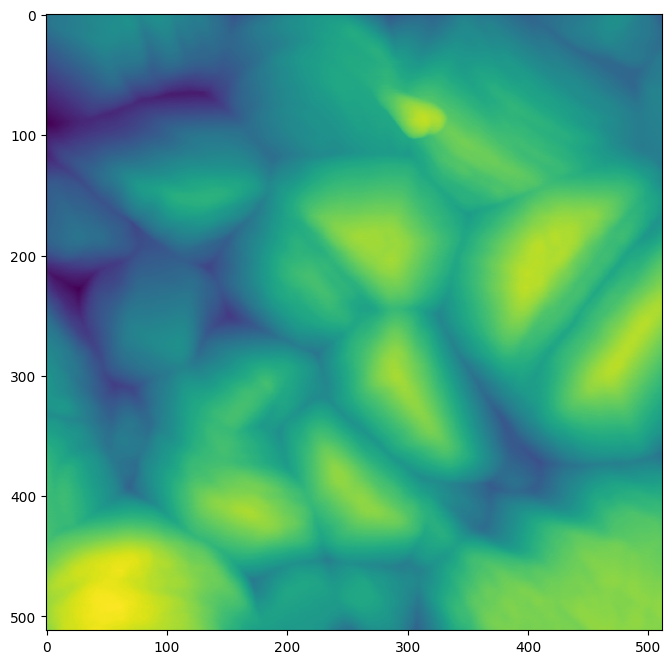

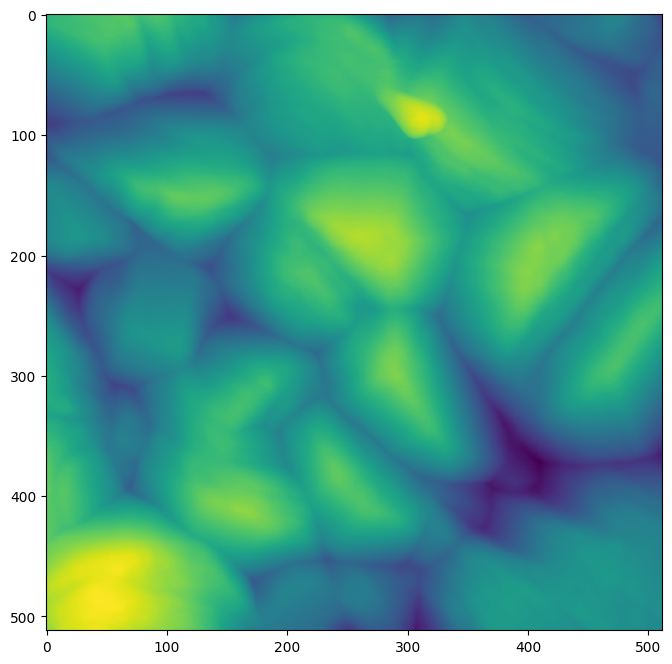

[Wed, 01 Mar 2023 15:55:34] [INFO    ] [topostats] Extracting image from perovskite/20230207_MeO_NPs_perov_1um.0_00005.spm
[Wed, 01 Mar 2023 15:55:34] [INFO    ] [topostats] Loading image from : perovskite/20230207_MeO_NPs_perov_1um.0_00005.spm
[Wed, 01 Mar 2023 15:55:34] [INFO    ] [topostats] [20230207_MeO_NPs_perov_1um.0_00005] : Loaded image from : perovskite/20230207_MeO_NPs_perov_1um.0_00005.spm
[Wed, 01 Mar 2023 15:55:34] [INFO    ] [topostats] [20230207_MeO_NPs_perov_1um.0_00005] : Extracted channel Height Sensor
[Wed, 01 Mar 2023 15:55:34] [INFO    ] [topostats] [20230207_MeO_NPs_perov_1um.0_00005] : Pixel to nm scaling : 1.953125


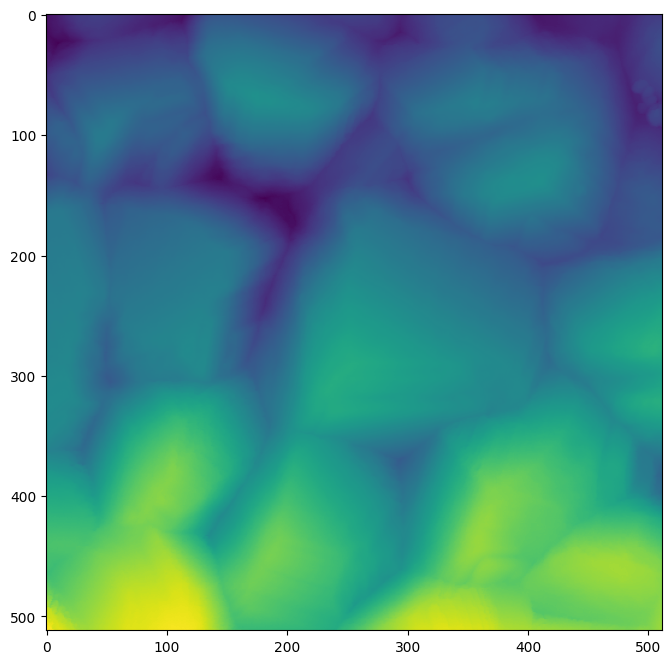

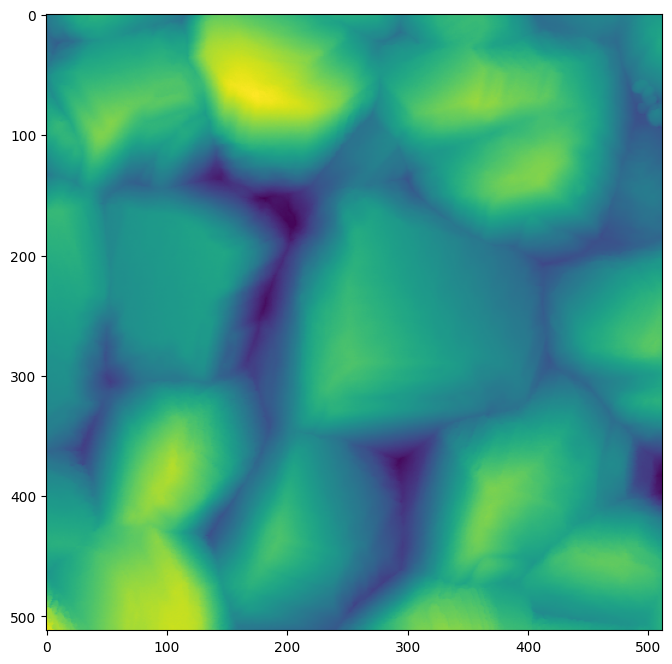

[Wed, 01 Mar 2023 15:55:35] [INFO    ] [topostats] Extracting image from perovskite/20230207_MeO_perov_10um.0_00001.spm
[Wed, 01 Mar 2023 15:55:35] [INFO    ] [topostats] Loading image from : perovskite/20230207_MeO_perov_10um.0_00001.spm
[Wed, 01 Mar 2023 15:55:35] [INFO    ] [topostats] [20230207_MeO_perov_10um.0_00001] : Loaded image from : perovskite/20230207_MeO_perov_10um.0_00001.spm
[Wed, 01 Mar 2023 15:55:35] [INFO    ] [topostats] [20230207_MeO_perov_10um.0_00001] : Extracted channel Height Sensor
[Wed, 01 Mar 2023 15:55:35] [INFO    ] [topostats] [20230207_MeO_perov_10um.0_00001] : Pixel to nm scaling : 19.53125


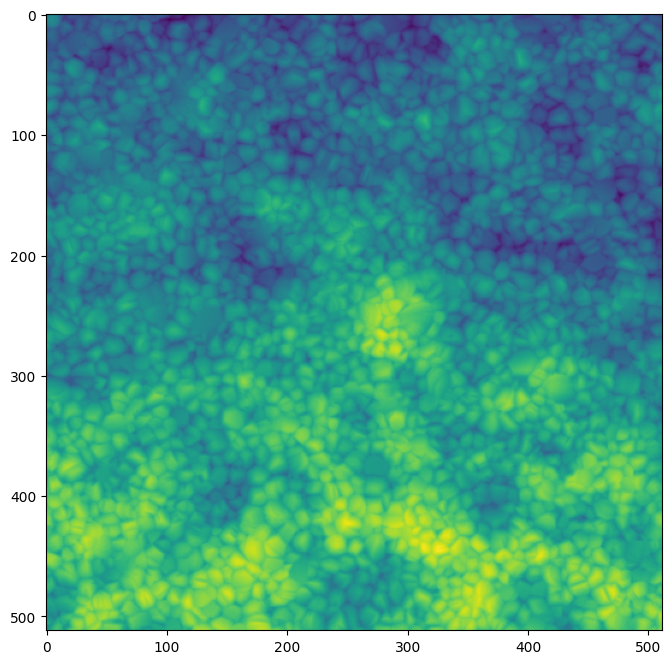

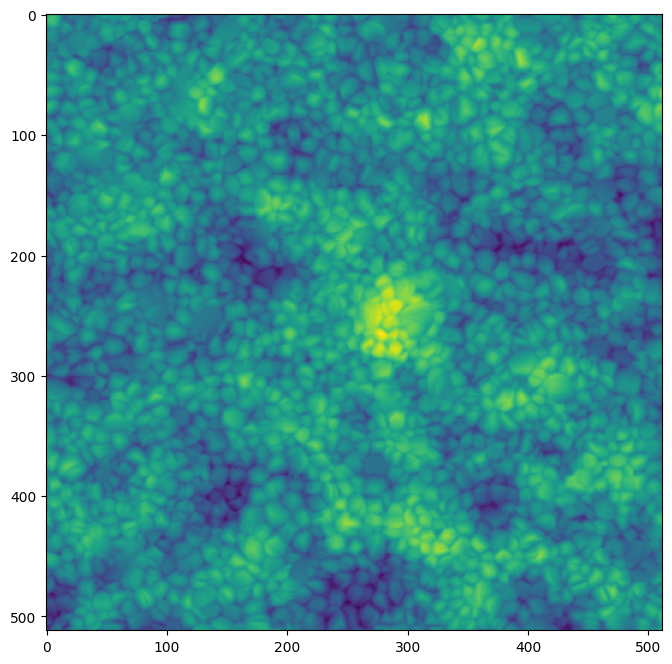

[Wed, 01 Mar 2023 15:55:36] [INFO    ] [topostats] Extracting image from perovskite/20230207_MeO_perov_1um.0_00002.spm
[Wed, 01 Mar 2023 15:55:36] [INFO    ] [topostats] Loading image from : perovskite/20230207_MeO_perov_1um.0_00002.spm
[Wed, 01 Mar 2023 15:55:36] [INFO    ] [topostats] [20230207_MeO_perov_1um.0_00002] : Loaded image from : perovskite/20230207_MeO_perov_1um.0_00002.spm
[Wed, 01 Mar 2023 15:55:36] [INFO    ] [topostats] [20230207_MeO_perov_1um.0_00002] : Extracted channel Height Sensor
[Wed, 01 Mar 2023 15:55:36] [INFO    ] [topostats] [20230207_MeO_perov_1um.0_00002] : Pixel to nm scaling : 1.953125


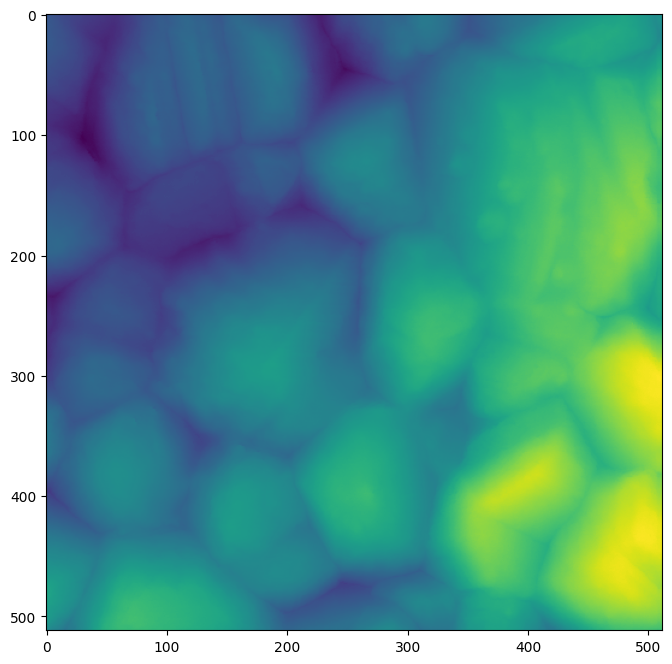

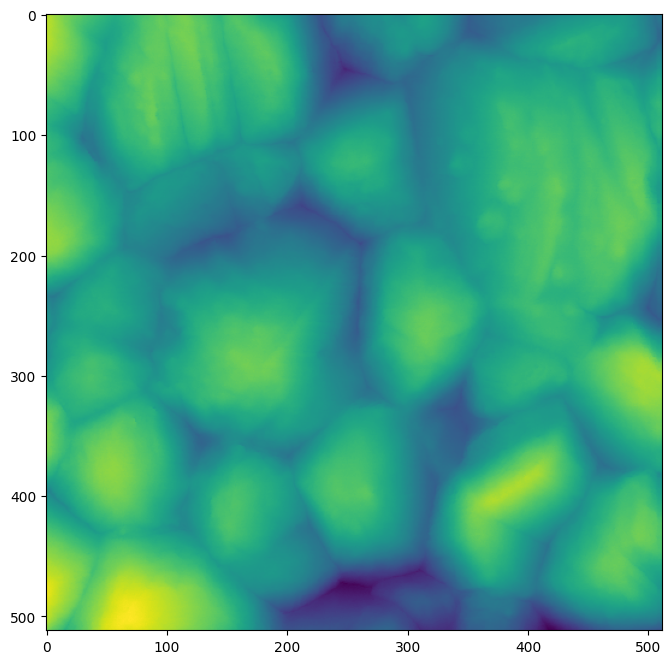

[Wed, 01 Mar 2023 15:55:37] [INFO    ] [topostats] Extracting image from perovskite/20230207_Me4_NPs_perov_5um.0_00006.spm
[Wed, 01 Mar 2023 15:55:37] [INFO    ] [topostats] Loading image from : perovskite/20230207_Me4_NPs_perov_5um.0_00006.spm
[Wed, 01 Mar 2023 15:55:37] [INFO    ] [topostats] [20230207_Me4_NPs_perov_5um.0_00006] : Loaded image from : perovskite/20230207_Me4_NPs_perov_5um.0_00006.spm
[Wed, 01 Mar 2023 15:55:37] [INFO    ] [topostats] [20230207_Me4_NPs_perov_5um.0_00006] : Extracted channel Height Sensor
[Wed, 01 Mar 2023 15:55:37] [INFO    ] [topostats] [20230207_Me4_NPs_perov_5um.0_00006] : Pixel to nm scaling : 9.765625


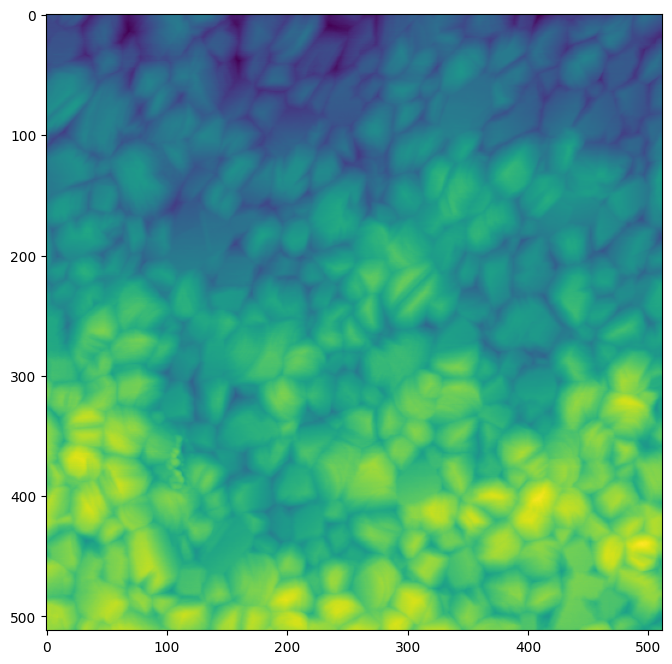

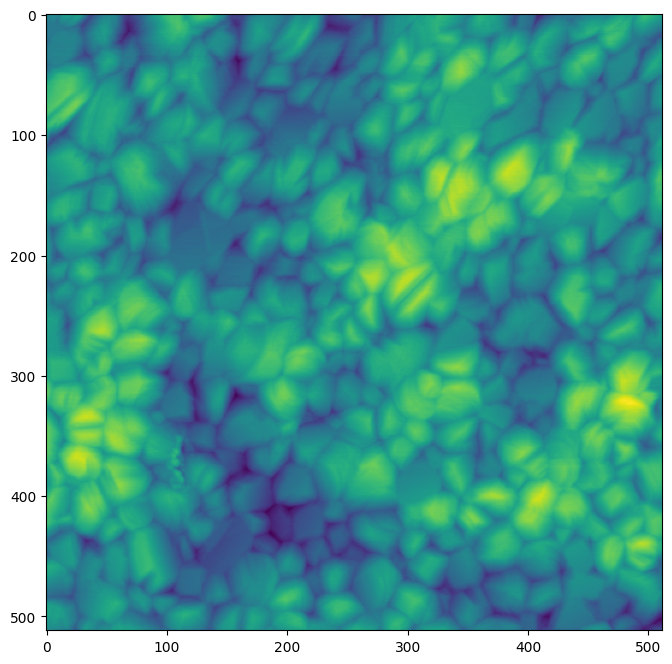

[Wed, 01 Mar 2023 15:55:38] [INFO    ] [topostats] Extracting image from perovskite/20230207_MeO_NPs_perov_5um.0_00003.spm
[Wed, 01 Mar 2023 15:55:38] [INFO    ] [topostats] Loading image from : perovskite/20230207_MeO_NPs_perov_5um.0_00003.spm
[Wed, 01 Mar 2023 15:55:38] [INFO    ] [topostats] [20230207_MeO_NPs_perov_5um.0_00003] : Loaded image from : perovskite/20230207_MeO_NPs_perov_5um.0_00003.spm
[Wed, 01 Mar 2023 15:55:38] [INFO    ] [topostats] [20230207_MeO_NPs_perov_5um.0_00003] : Extracted channel Height Sensor
[Wed, 01 Mar 2023 15:55:38] [INFO    ] [topostats] [20230207_MeO_NPs_perov_5um.0_00003] : Pixel to nm scaling : 9.765625


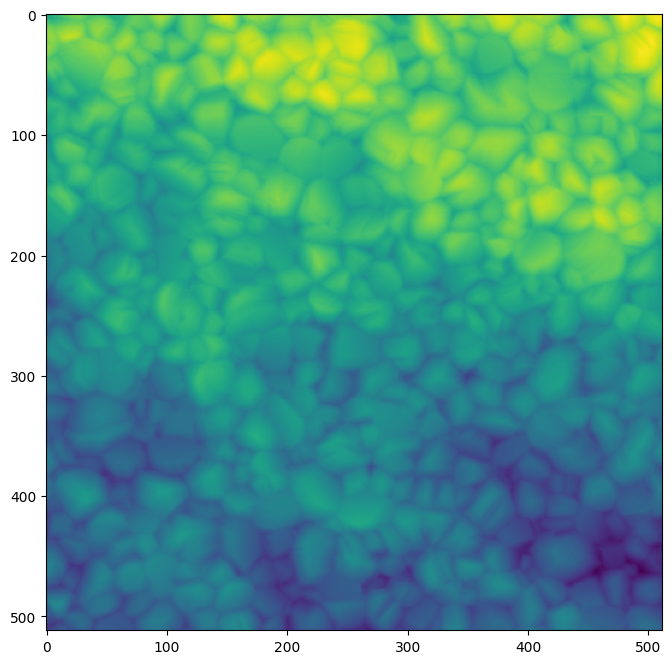

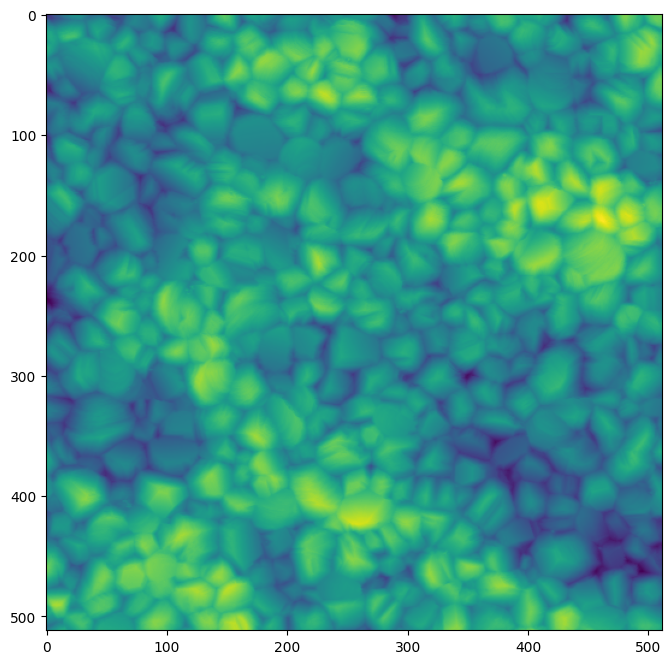

[Wed, 01 Mar 2023 15:55:39] [INFO    ] [topostats] Extracting image from perovskite/20230207_MeO_perov_5um.0_0000.spm
[Wed, 01 Mar 2023 15:55:39] [INFO    ] [topostats] Loading image from : perovskite/20230207_MeO_perov_5um.0_0000.spm
[Wed, 01 Mar 2023 15:55:39] [INFO    ] [topostats] [20230207_MeO_perov_5um.0_0000] : Loaded image from : perovskite/20230207_MeO_perov_5um.0_0000.spm
[Wed, 01 Mar 2023 15:55:39] [INFO    ] [topostats] [20230207_MeO_perov_5um.0_0000] : Extracted channel Height Sensor
[Wed, 01 Mar 2023 15:55:39] [INFO    ] [topostats] [20230207_MeO_perov_5um.0_0000] : Pixel to nm scaling : 9.765625


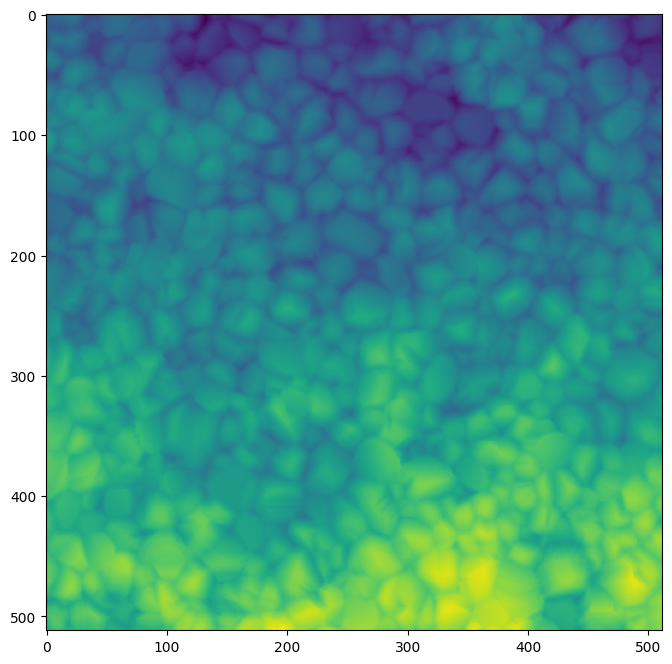

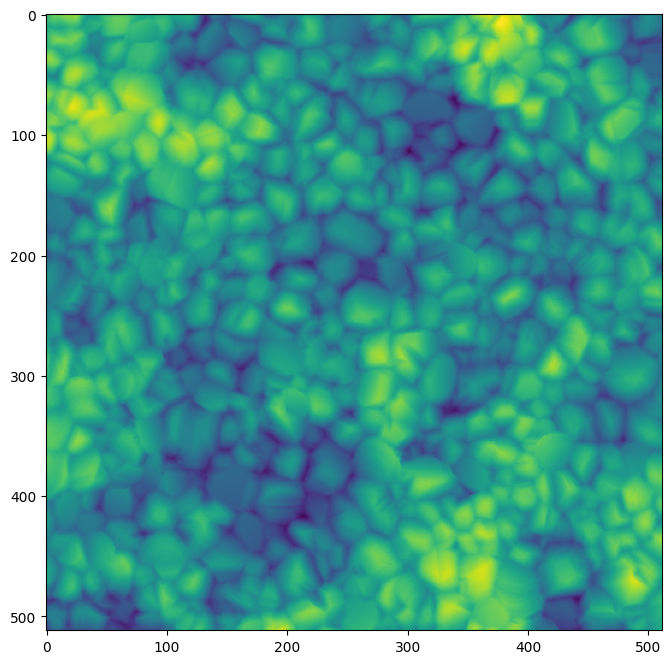

[Wed, 01 Mar 2023 15:55:40] [INFO    ] [topostats] Extracting image from perovskite/20230207_Me4_NPs_perov_10um.0_00007.spm
[Wed, 01 Mar 2023 15:55:40] [INFO    ] [topostats] Loading image from : perovskite/20230207_Me4_NPs_perov_10um.0_00007.spm
[Wed, 01 Mar 2023 15:55:40] [INFO    ] [topostats] [20230207_Me4_NPs_perov_10um.0_00007] : Loaded image from : perovskite/20230207_Me4_NPs_perov_10um.0_00007.spm
[Wed, 01 Mar 2023 15:55:40] [INFO    ] [topostats] [20230207_Me4_NPs_perov_10um.0_00007] : Extracted channel Height Sensor
[Wed, 01 Mar 2023 15:55:40] [INFO    ] [topostats] [20230207_Me4_NPs_perov_10um.0_00007] : Pixel to nm scaling : 19.53125


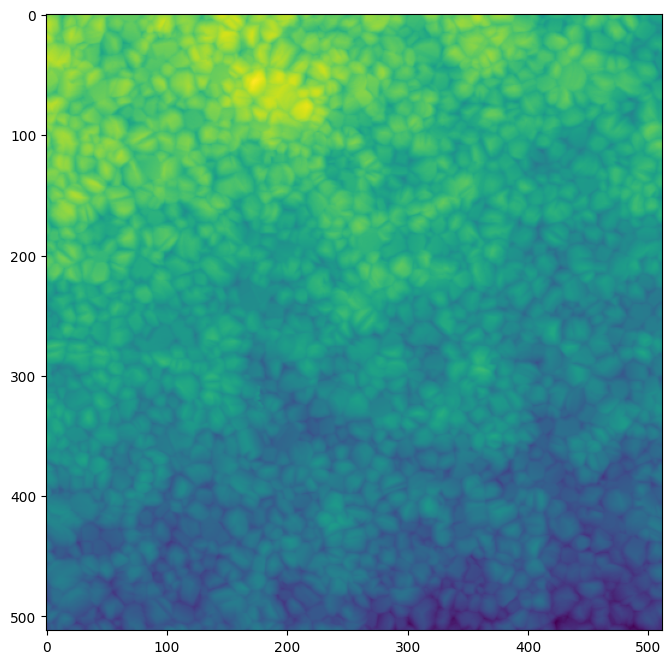

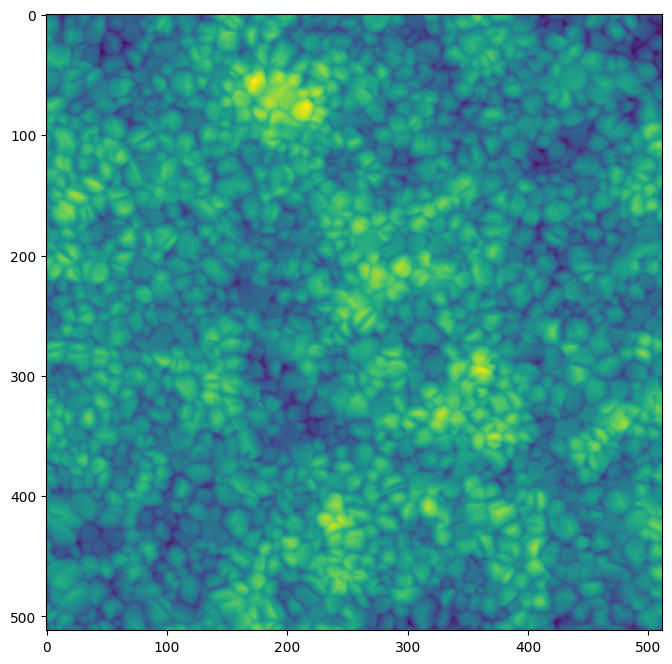

In [26]:
files = Path('./perovskite/').glob('*.spm')

for file in files:
    loadscans = LoadScans([file], 'Height Sensor')
    loadscans.get_data()
    img = loadscans.image
    px_to_nm_scaling = loadscans.pixel_to_nm_scaling
    # Plot initial image
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(img)
    fig.savefig(str(file) + '.png')
    plt.show()
    # Flatten
    flattened = remove_tilt(image=img, mask=None)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(flattened)
    fig.savefig(str(file) + '_flattened.png')
    plt.show()
